In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("travel insurance.csv")

In [3]:
insurance.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
38103,C2B,Airlines,Online,Bronze Plan,No,13,SINGAPORE,13.5,3.38,F,55
57555,C2B,Airlines,Online,Silver Plan,No,10,SINGAPORE,46.8,11.70,M,1
257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,40,SOUTH AFRICA,128.7,77.22,NaN,55
40129,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,57,"TAIWAN, PROVINCE OF CHINA",30.0,0.00,NaN,36
8999,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,15,CAMBODIA,20.0,0.00,NaN,36


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


Data Preprocessing

Data Splitting

In [5]:
insurance = insurance.sample(frac=1, random_state=51)

In [6]:
insurance = insurance.drop_duplicates()

In [7]:
insurance.drop(["Gender"], axis=1, inplace=True)

Rare Labels

In [8]:
def group_rare_labels(df, var, amt=0.05):

    total = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= amt].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [9]:
insurance["Product Name"] = group_rare_labels(insurance, "Product Name")
insurance["Agency Type"] = group_rare_labels(insurance, "Agency Type")

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = insurance.drop("Claim", axis=1)
y = insurance["Claim"].map({"No": 0, "Yes" : 1})

In [12]:
insurance, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Missing Data

In [13]:
insurance.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

Outlier Capping

In [14]:
from feature_engine.outliers import Winsorizer

In [15]:
capper = Winsorizer(variables=["Net Sales", "Commision (in value)"])

In [16]:
capper.fit(insurance)

Winsorizer(variables=['Net Sales', 'Commision (in value)'])

In [17]:
insurance  = capper.transform(insurance)

Feature Scaling

In [18]:
numerical =['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(insurance[numerical])

StandardScaler()

In [22]:
insurance[numerical] = scaler.transform(insurance[numerical])

Feature Encoding

In [23]:
from feature_engine.encoding import OneHotEncoder

In [24]:
encoder = OneHotEncoder()

In [25]:
encoder.fit(insurance)

OneHotEncoder()

In [26]:
insurance = encoder.transform(insurance);

c:\Users\Eyimo\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
c:\Users\Eyimo\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
c:\Users\Eyimo\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This

Class Imbalance

In [27]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [28]:
ros = RandomOverSampler(random_state=51)

In [29]:
insurance, y_train = ros.fit_resample(insurance, y_train)

Model Building

In [30]:
X_test = capper.transform(X_test)
X_test[numerical] = scaler.transform(X_test[numerical])
X_test = encoder.transform(X_test)

c:\Users\Eyimo\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
c:\Users\Eyimo\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
c:\Users\Eyimo\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:252: PerformanceWarning: DataFrame is highly fragmented.  This

LG

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(max_iter=600)

In [33]:
model.fit(insurance, y_train);

In [34]:
predictions = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [36]:
print(f"accuracy: {accuracy_score(y_test, predictions)}")
print(f"precision: {precision_score(y_test, predictions)}")
print(f"recall: {recall_score(y_test, predictions)}")
print(f"f1: {f1_score(y_test, predictions)}")
print(f"roc_auc: {roc_auc_score(y_test, predictions)}")

accuracy: 0.7827620511892919
precision: 0.0564
recall: 0.7663043478260869
f1: 0.10506706408345752
roc_auc: 0.7746724535046925


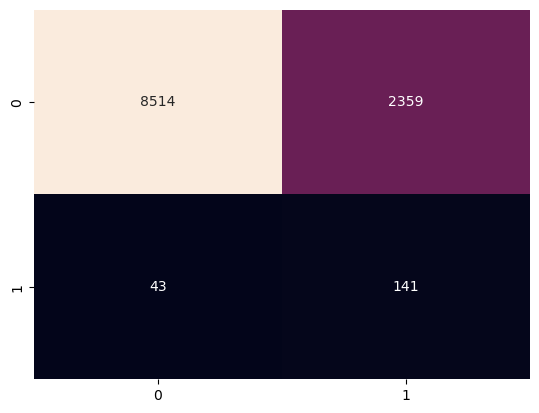

In [37]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False, fmt="d");

LIghtGBM

In [38]:
import re
insurance = insurance.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [39]:
from lightgbm import LGBMClassifier

In [40]:
lgb = LGBMClassifier(random_state=51, n_jobs=-1)

In [41]:
lgb.fit(insurance, y_train);

In [42]:
predictions = lgb.predict(X_test)

In [43]:
print(f"accuracy: {accuracy_score(y_test, predictions)}")
print(f"precision: {precision_score(y_test, predictions)}")
print(f"recall: {recall_score(y_test, predictions)}")
print(f"f1: {f1_score(y_test, predictions)}")
print(f"roc_auc: {roc_auc_score(y_test, predictions)}")

accuracy: 0.8420005426426698
precision: 0.06316377864728899
recall: 0.6141304347826086
f1: 0.11454637607704005
roc_auc: 0.7299935720312382


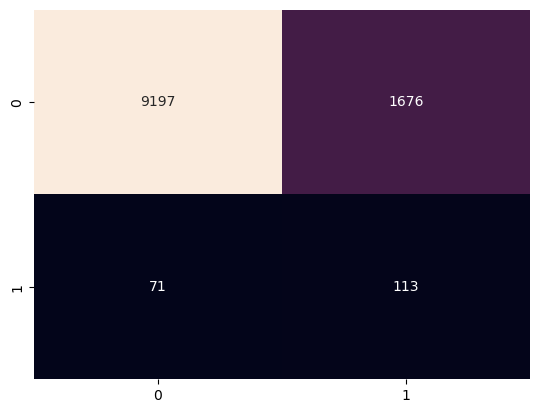

In [44]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False, fmt="d");